In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import os

_FILE = "../files/input/shipping-data.csv"
_DOCS = "../docs/"
_WAREHOUSE = "../docs/shipping_per_warehouse.png"
_MODE = "../docs/mode_of_shipments.png"
_AVERAGE = "../docs/average_customer_rating.png"
_WEIGHT = "../docs/weight_distribution.png"

In [41]:
def load_data():
    df = pd.read_csv(_FILE)
    return df

load_data().head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


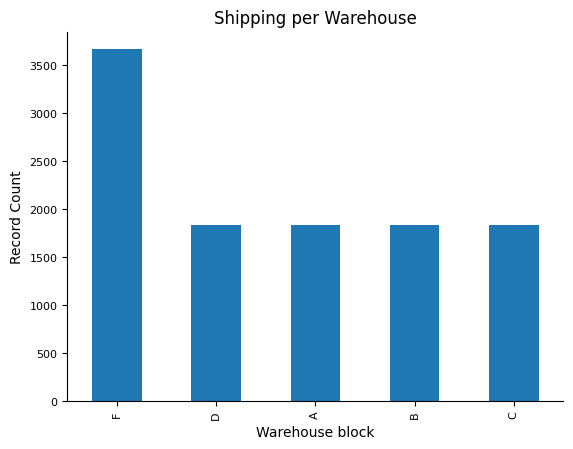

In [42]:
def create_visual_for_shipping_per_warehouse(df):
    df = df.copy()
    plt.figure()
    counts = df.Warehouse_block.value_counts()
    counts.plot.bar(
        title = "Shipping per Warehouse",
        xlabel = "Warehouse block",
        ylabel = "Record Count",
        color = "tab:blue",
        fontsize=8
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    os.makedirs(_DOCS, exist_ok=True)
    plt.savefig(_WAREHOUSE)

df = load_data()
create_visual_for_shipping_per_warehouse(df)

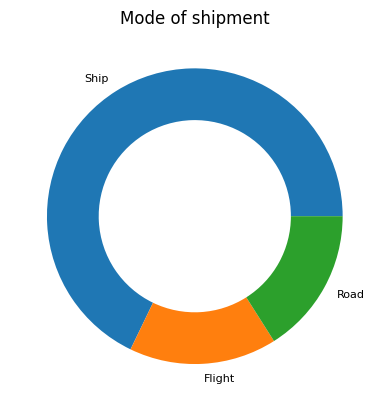

In [43]:
def create_visual_for_mode_of_shipment(df):
    df = df.copy()
    plt.figure()
    counts = df.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title = "Mode of shipment",
        wedgeprops=dict(width=0.35),
        ylabel = "",
        colors = ["tab:blue", "tab:orange", "tab:green"],
        fontsize=8
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    os.makedirs(_DOCS, exist_ok=True)
    plt.savefig(_MODE)

df = load_data()
create_visual_for_mode_of_shipment(df)

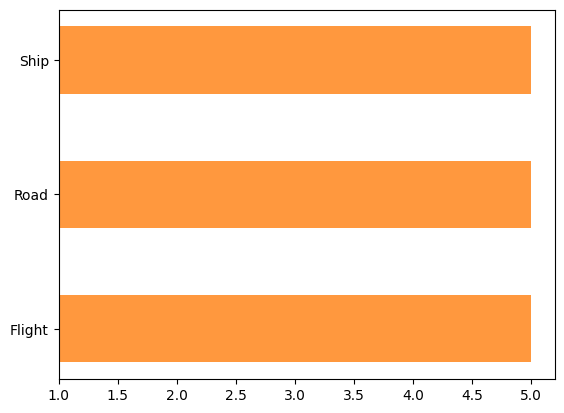

In [44]:
def create_visual_for_average_customer_rating(df):
    df = df.copy()
    plt.figure()
    df = (
        df[["Mode_of_Shipment", "Customer_rating"]]
        .groupby("Mode_of_Shipment")
        .describe()
    )
    df.columns = df.columns.droplevel()
    df = df[["mean", "min", "max"]]
    
    colors = [
        "tab:green" if value >= 3.0 else "tab:orange" for value in df["mean"].values
    ]

    plt.barh(
        y=df.index.values,
        width=df["max"].values -1,
        left=df["min"].values,
        color = colors,
        height=0.5,
        alpha=0.8,
    )

    os.makedirs(_DOCS, exist_ok=True)
    plt.savefig(_AVERAGE)

df = load_data()
create_visual_for_average_customer_rating(df)

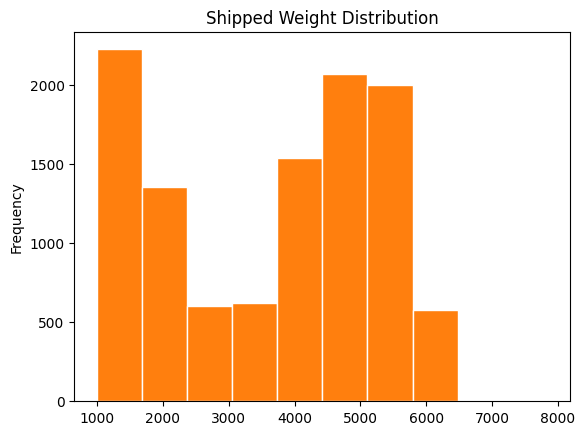

In [45]:
def create_visual_for_weight_distribution(df):
    df = df.copy()
    plt.figure()
    df.Weight_in_gms.plot.hist(
        title="Shipped Weight Distribution",
        color = "tab:orange",
        edgecolor="white"
    )    

    os.makedirs(_DOCS, exist_ok=True)
    plt.savefig(_WEIGHT)

df = load_data()
create_visual_for_weight_distribution(df)

In [ ]:
%%writefile index.html

<html>

</html>

Writing index.html%%
